In [90]:
import pandas as pd
import numpy as np
f=(10,6)
import matplotlib.pyplot as plt

In [91]:
data=pd.read_csv('aiif_eikon_eod_data.csv',usecols=['Date','GDX'],parse_dates=True)
data.rename(columns={'GDX':'price'},inplace=True)
data.dropna(inplace=True)
data.head()


,Date,price
1,2010-01-04,47.71
2,2010-01-05,48.17
3,2010-01-06,49.34
4,2010-01-07,49.10
5,2010-01-08,49.84


,Date,price,returns
1,2010-01-04,47.71,NaN
2,2010-01-05,48.17,0.009595
3,2010-01-06,49.34,0.023999
4,2010-01-07,49.10,-0.004876
5,2010-01-08,49.84,0.014959


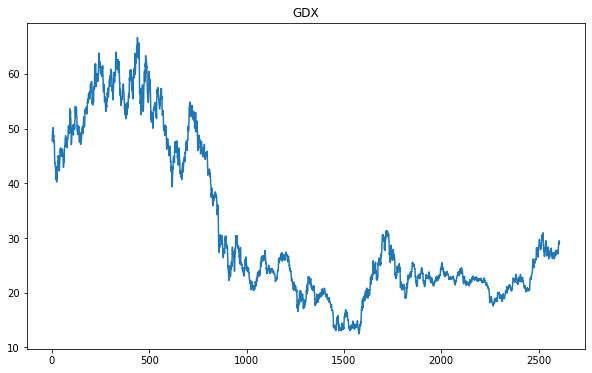

In [92]:
data.price.plot(title="GDX",figsize=f)
data['returns']=np.log(data.price/data.price.shift(1))
data.head()

In [93]:
SMA=25

<AxesSubplot:title={'center':'GDX price and average of the first 500 entries for visualization '}>

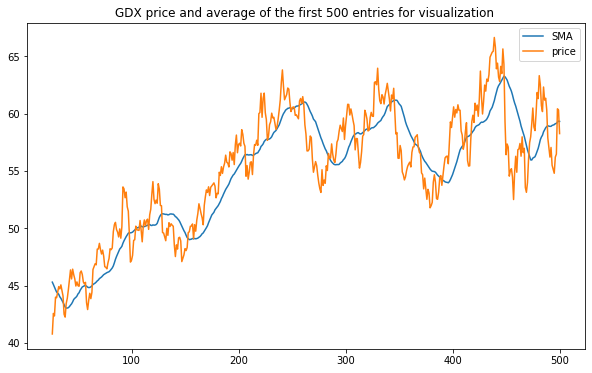

In [94]:
data['SMA']=data['price'].rolling(SMA).mean()
data.tail()
data.loc[:500,['SMA','price']].dropna().plot(title="GDX price and average of the first 500 entries for visualization ",figsize=f)

In [95]:
threshold=3.5

In [96]:
data['distance']=data.price-data.SMA
data.tail()

,Date,price,returns,SMA,distance
2602,2019-12-24,28.66,0.031546,27.2824,1.3776
2604,2019-12-26,29.08,0.014548,27.3564,1.7236
2605,2019-12-27,28.87,-0.007248,27.4176,1.4524
2606,2019-12-30,29.49,0.021248,27.5244,1.9656
2607,2019-12-31,29.28,-0.007147,27.6252,1.6548


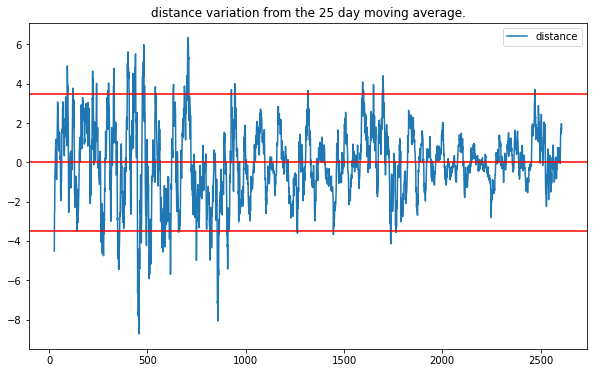

In [97]:
data['distance'].dropna().plot(figsize=f,legend=True,title="distance variation from the 25 day moving average.")
plt.axhline(threshold,color='r',label='threshold=3.5')

plt.axhline(-threshold,color='r')
plt.axhline(0,color='r')

In [98]:
data['position']=np.where(data['distance']>threshold,-1,np.nan)
data['position']=np.where(data['distance']<-threshold,1,data['position'])

In [99]:
data.position=np.where(data.distance*data.distance.shift(1)<0,0,data.position)

In [100]:
data.position=data.position.ffill().fillna(0)


<AxesSubplot:>

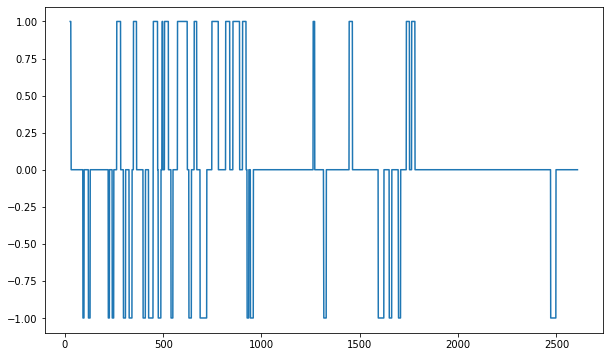

In [102]:
data.position.iloc[SMA:].plot(ylim=[-1.1,1.1],figsize=f)

In [104]:
data['strategy']=data.position.shift(1)*data['returns']

<AxesSubplot:>

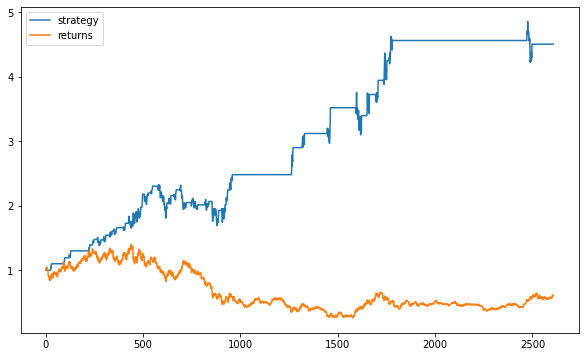

In [105]:
data[['strategy','returns']].dropna().cumsum().apply(np.exp).plot(figsize=f)

In [106]:
import MRVectorBacktester as mr

In [107]:
mrbt=mr.MRVectorBacktester('GLD','2010-1-1','2019-12-31',10000,0.001)

In [108]:
mrbt.run_strategy(SMA=43,threshold=7.5)

(13542.15, 646.21)

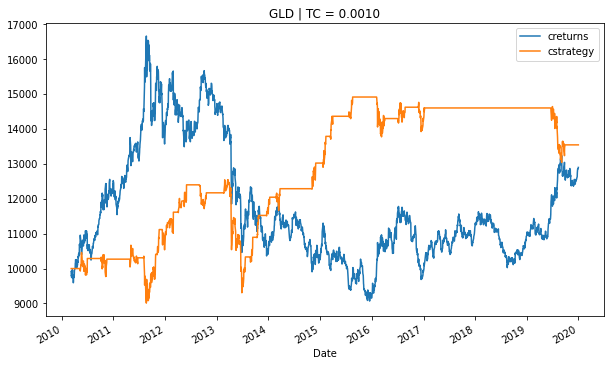

In [109]:
mrbt.plot_results()